In [1]:
##########################################################################
# Created on Sat Otc 28 23:04:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

In [2]:
import matplotlib.pyplot as plt #submodule pyplot

# 4.2.1.Single curve

In [3]:
import numpy_financial as npf
import numpy as np

In [4]:
r=0.05
n=30
principle=8e6

pay_month=npf.pmt(rate=r/12,nper=n*12,pv=principle,fv=0,when='end')
print('Monthly payment: ',round(pay_month,2))

Monthly payment:  -42945.73


In [5]:
T_list=np.arange(n*12)+1
prin_month=npf.ppmt(rate=r/12,per=T_list,nper=n*12,pv=principle,fv=0,when='end')
inte_month=npf.ipmt(rate=r/12,per=T_list,nper=n*12,pv=principle,fv=0,when='end')

In [6]:
pay_month_list=pay_month*np.ones_like(prin_month)

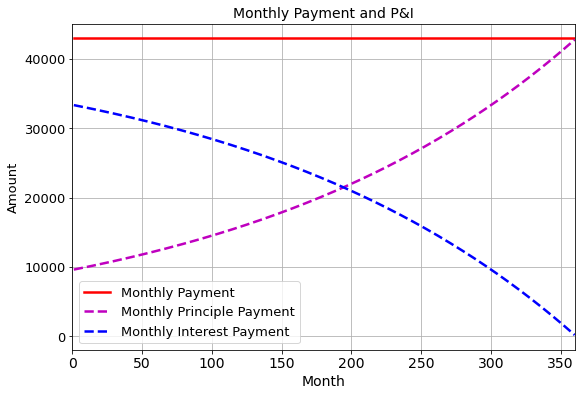

In [7]:
plt.figure(figsize=(9,6),frameon=False)
plt.plot(T_list,-pay_month_list,'r-',label='Monthly Payment',lw=2.5)
plt.plot(T_list,-prin_month,'m--',label='Monthly Principle Payment',lw=2.5)
plt.plot(T_list,-inte_month,'b--',label='Monthly Interest Payment',lw=2.5)
plt.xticks(fontsize=14)
plt.xlim(0,360)
plt.xlabel('Month',fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.title('Monthly Payment and P&I',fontsize=14)
plt.legend(loc=0,fontsize=13)
plt.grid()
plt.show()

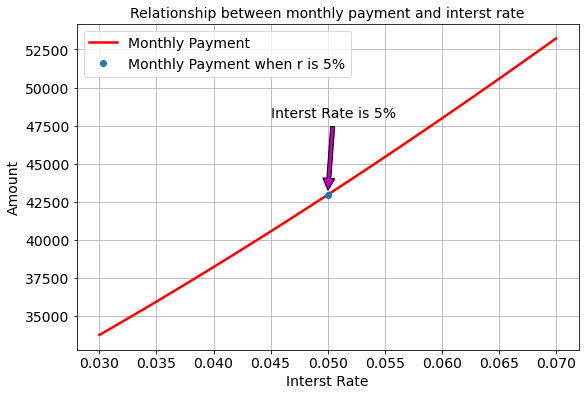

In [10]:
r_list=np.linspace(0.03,0.07,100)
pay_month_list=npf.pmt(rate=r_list/12,nper=n*12,pv=principle,fv=0,when='end')

plt.figure(figsize=(9,6))
plt.plot(r_list,-pay_month_list,'r-',label='Monthly Payment',lw=2.5)
plt.plot(r,-pay_month,'o',label='Monthly Payment when r is 5%',lw=2.5)
plt.xticks(fontsize=14)
plt.xlabel('Interst Rate',fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.annotate('Interst Rate is 5%',fontsize=14,xy=(0.05,43000),xytext=(0.045,48000),arrowprops=dict(facecolor='m',shrink=0.05))
plt.title('Relationship between monthly payment and interst rate',fontsize=14)
plt.legend(loc=0,fontsize=14)
plt.grid()
plt.show()

# 4.2.2.Multiple curves

In [11]:
import pandas as pd
SZ_Index=pd.read_excel('SZ_Index daily(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
SZ_Index.index #Note that the dtype of index is object

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
       '2020-12-25', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
      dtype='object', name='Date', length=730)

In [13]:
SZ_Index.index=pd.DatetimeIndex(SZ_Index.index) #Change it to Datetime
SZ_Index.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=730, freq=None)

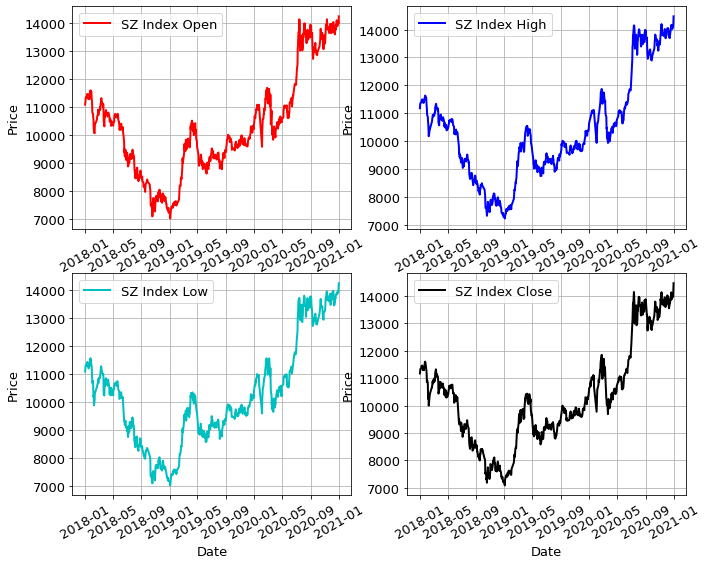

In [14]:
plt.figure(figsize=(11,9))

plt.subplot(2,2,1) #First subplot
plt.plot(SZ_Index['Open'],'r-',label='SZ Index Open',lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel('Date',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()

plt.subplot(2,2,2) #Second subplot
plt.plot(SZ_Index['High'],'b-',label='SZ Index High',lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel('Date',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()

plt.subplot(2,2,3) #Third subplot
plt.plot(SZ_Index['Low'],'c-',label='SZ Index Low',lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel('Date',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()

plt.subplot(2,2,4) #Forth subplot
plt.plot(SZ_Index['Close'],'k-',label='SZ Index Close',lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel('Date',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()